In [1]:
import numpy as np
from numpy.linalg import pinv
np.set_printoptions(precision=4, suppress=True)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import logging
import os
import sys
import tempfile

import gym

In [3]:
class RandomAgent(object):
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [5]:
env = gym.make('MountainCar-v0')

[2016-09-15 00:21:34,158] Making new env: MountainCar-v0


In [16]:
outdir = tempfile.mkdtemp()

In [17]:
env.monitor.start(outdir, force=True, seed=23)

In [18]:
agent = RandomAgent(env.action_space)

In [19]:
num_episodes = 10
max_steps = 5000
reward = 0
done = False

for episode in range(num_episodes):
    obs = env.reset()
    for step in range(max_steps):
        action = agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        
        if done:
            break
            
env.monitor.close()
logger.info("Done.")

[2016-09-14 22:46:11,941] Starting new video recorder writing to /tmp/tmp1gjzagqo/openaigym.video.1.17931.video000000.mp4
[2016-09-14 22:46:18,974] Starting new video recorder writing to /tmp/tmp1gjzagqo/openaigym.video.1.17931.video000001.mp4
[2016-09-14 22:46:25,824] Starting new video recorder writing to /tmp/tmp1gjzagqo/openaigym.video.1.17931.video000008.mp4
[2016-09-14 22:46:32,718] Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/tmp1gjzagqo')
[2016-09-14 22:46:32,719] Done.


In [81]:
scale

[0.55555555555555558, 7.1428571428571423]

In [15]:
space = env.observation_space
bound = [x for x in zip(space.low, space.high)]
scale = np.array([1/(hi-lo) for lo, hi in bound])
shift = np.array([x for x in space.low])

grid = np.meshgrid(*[np.linspace(lo, hi, 50) for lo, hi in zip(space.low, space.high)])
entries = np.array([x for x in zip(*[g.ravel() for g in grid])])

In [9]:
scale

array([ 1.8 ,  0.14])

In [17]:
split = np.array([8, 8])

([array([ 350.,  300.,  300.,  300.,    0.,  300.,  300.,  300.,  300.,   50.]),
  array([ 350.,  300.,  300.,  300.,    0.,  300.,  300.,  300.,  300.,   50.])],
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 2 Lists of Patches objects>)

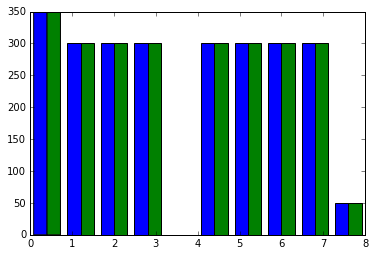

In [19]:
class GridTiles(nin, shape, scale, offset):
    pass